In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
solar_dat = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Capacity Factor/Solar/ninja_pv_country_GB_merra-2_corrected.csv')
print(solar_dat.head())

               time  national
0  01/01/1985 00:00       0.0
1  01/01/1985 01:00       0.0
2  01/01/1985 02:00       0.0
3  01/01/1985 03:00       0.0
4  01/01/1985 04:00       0.0


In [19]:
solar_dat['time'] = pd.to_datetime(solar_dat['time'])
# solar_dat = solar_dat.set_index('time')
print(solar_dat.head())

                 time  national
0 1985-01-01 00:00:00       0.0
1 1985-01-01 01:00:00       0.0
2 1985-01-01 02:00:00       0.0
3 1985-01-01 03:00:00       0.0
4 1985-01-01 04:00:00       0.0


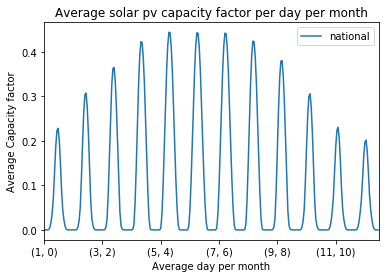

In [39]:
month = solar_dat.groupby([solar_dat['time'].dt.month, solar_dat['time'].dt.hour]).mean()
month.plot.line()
plt.title("Average solar pv capacity factor per day per month")
plt.ylabel("Average Capacity factor")
plt.xlabel("Average day per month")
plt.show()

In [29]:
energy_demand = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Electricity Demand/gridwatch.csv")
energy_demand = energy_demand[energy_demand.timestamp < '2016-12-31'].iloc[3:]
energy_demand = energy_demand.drop('id', 1)
energy_demand['timestamp'] = pd.to_datetime(energy_demand['timestamp'])
# energy_demand = energy_demand.set_index('timestamp')
print(energy_demand.tail())

                 timestamp  demand
586962 2016-12-30 23:35:01   28363
586963 2016-12-30 23:40:01   28435
586964 2016-12-30 23:45:02   28353
586965 2016-12-30 23:50:01   28198
586966 2016-12-30 23:55:01   28009


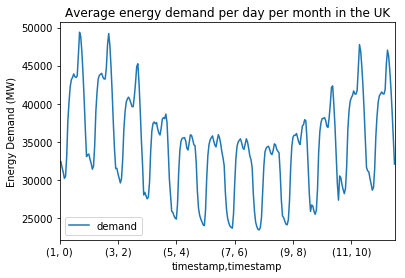

In [30]:
energy_month = energy_demand.groupby([energy_demand['timestamp'].dt.month, energy_demand['timestamp'].dt.hour]).mean()
energy_month.plot.line().set_ylabel("Energy Demand (MW)")
plt.title("Average energy demand per day per month in the UK")
plt.show()

In [45]:
energy_demand_mean = energy_demand.set_index('timestamp').resample('1H').mean()
print(energy_demand_mean.head())

                           demand
timestamp                        
2011-05-27 16:00:00  38649.090909
2011-05-27 17:00:00  37497.583333
2011-05-27 18:00:00  36146.333333
2011-05-27 19:00:00  34741.166667
2011-05-27 20:00:00  34722.666667


In [46]:
solar_dat = solar_dat.set_index('time')
print(solar_dat.head())

                     national
time                         
1985-01-01 00:00:00       0.0
1985-01-01 01:00:00       0.0
1985-01-01 02:00:00       0.0
1985-01-01 03:00:00       0.0
1985-01-01 04:00:00       0.0


In [53]:
series = energy_demand_mean[(energy_demand_mean.demand>20000) & (energy_demand_mean.demand<50000)].join(solar_dat, how='inner')
print(series.head())

                           demand  national
2011-05-27 16:00:00  38649.090909    0.2290
2011-05-27 17:00:00  37497.583333    0.1367
2011-05-27 18:00:00  36146.333333    0.0541
2011-05-27 19:00:00  34741.166667    0.0090
2011-05-27 20:00:00  34722.666667    0.0000


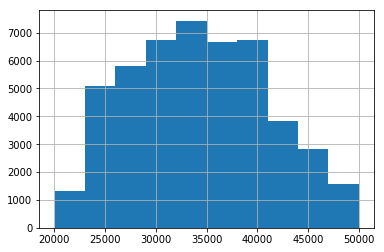

In [54]:
series.demand.hist()
plt.show()

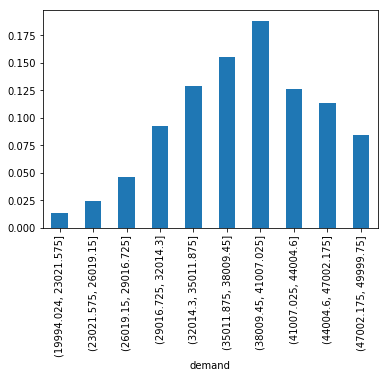

In [55]:
series.groupby(pd.cut(series.demand,10)).national.mean().plot(kind='bar')
plt.show()

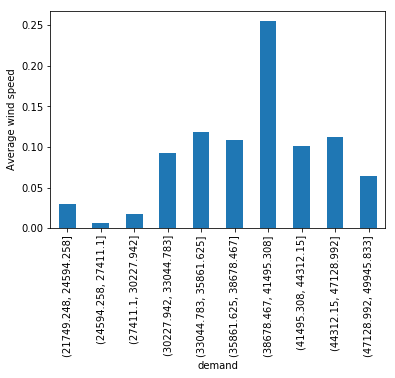

In [56]:
series_2011 = series[(series.index>'2011-01-01') & (series.index<'2012-01-01')]
series_2011.groupby(pd.cut(series_2011.demand,10)).national.mean().plot(kind='bar').set_ylabel("Average wind speed")
plt.show()

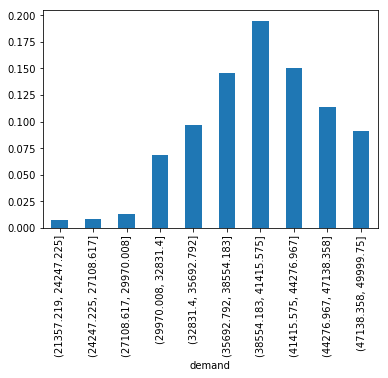

In [58]:
series_2012 = series[(series.index>'2012-01-01') & (series.index<'2013-01-01')]
series_2012.groupby(pd.cut(series_2012.demand,10)).national.mean().plot(kind='bar')
plt.show()

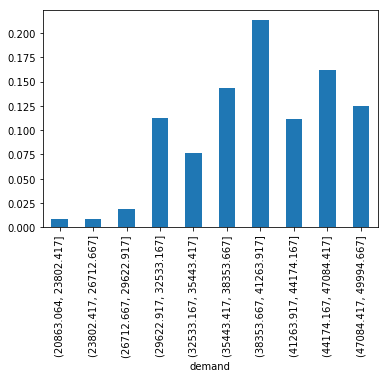

In [59]:
series_2013 = series[(series.index>'2013-01-01') & (series.index<'2014-01-01')]
series_2013.groupby(pd.cut(series_2013.demand,10)).national.mean().plot(kind='bar')
plt.show()

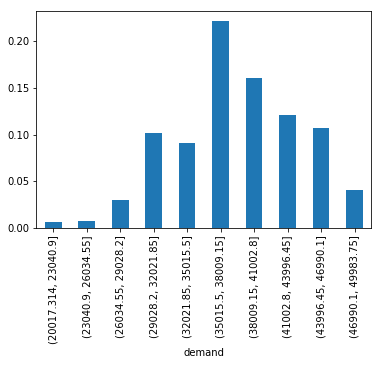

In [63]:
series_2014 = series[(series.index>'2014-01-01') & (series.index<'2015-01-01')]
series_2014.groupby(pd.cut(series_2014.demand,10)).national.mean().plot(kind='bar')
plt.show()

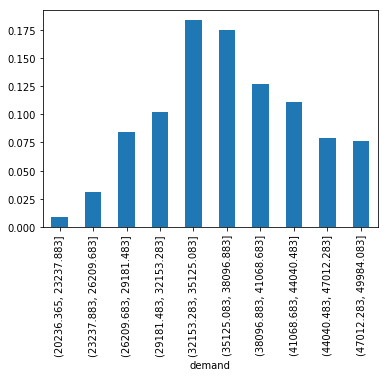

In [64]:
series_2015 = series[(series.index>'2015-01-01') & (series.index<'2016-01-01')]
series_2015.groupby(pd.cut(series_2015.demand,10)).national.mean().plot(kind='bar')
plt.show()